## Gaussian Naive Bayes and Breast Cancer

Data from the UCI Machine Learning Respository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Originally gathered by Dr. William H. Wolberg at the University of Wisconsin Hospitals

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [1]:
import pandas as pd
#from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%pylab inline

/Users/d739791/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
cancer_data = pd.read_csv("cancer.csv")
cancer_data.head(10)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Brand Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
cancer_data.iloc[23]


ID                             1057013
Clump Thickness                      8
Uniformity of Cell Size              4
Uniformity of Cell Shape             5
Marginal Adhesion                    1
Single Epithelial Cell Size          2
Bare Nuclei                          ?
Brand Chromatin                      7
Normal Nucleoli                      3
Mitosis                              1
Class                                4
Name: 23, dtype: object

We have some missing values coded as '?' 

We'll just remove those observations for simplicity. 

In [4]:
# This line will convert everything not a string into a NaN
cancer_data= cancer_data.convert_objects(convert_numeric = True) 
cancer_data.iloc[23]

/Users/d739791/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


ID                             1057013.0
Clump Thickness                      8.0
Uniformity of Cell Size              4.0
Uniformity of Cell Shape             5.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          NaN
Brand Chromatin                      7.0
Normal Nucleoli                      3.0
Mitosis                              1.0
Class                                4.0
Name: 23, dtype: float64

In [5]:
# This line will drop any lines with a NaN value—thereby removing the missing values
print len(cancer_data)
cancer_data = cancer_data.dropna(axis = 0)
print len(cancer_data)
cancer_data.iloc[23]

699
683


ID                             1059552.0
Clump Thickness                      1.0
Uniformity of Cell Size              1.0
Uniformity of Cell Shape             1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Brand Chromatin                      3.0
Normal Nucleoli                      1.0
Mitosis                              1.0
Class                                2.0
Name: 24, dtype: float64

So we dropped 16 observations, which is still enough data for what we want to do

We'll rename the target variables 'benign' and 'malignant' instead of '2' and '4', respectively. It won't change the analysis, but it will make it easier for us to understand 

We'll then extract the values into a NumPy array to feed into the Naive Bayes classifier

In [6]:
cancer_data = cancer_data.drop('ID', axis = 1) # removing the ID observation for analysis
cancer_data.ix[cancer_data['Class'] == 2.0, 'Class'] = 'benign'
cancer_data.ix[cancer_data['Class'] == 4.0, 'Class'] = 'malignant'

In [7]:
cancer_data.head(25)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Brand Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
5,8,10,10,8,7,10.0,9,7,1,malignant
6,1,1,1,1,2,10.0,3,1,1,benign
7,2,1,2,1,2,1.0,3,1,1,benign
8,2,1,1,1,2,1.0,1,1,5,benign
9,4,2,1,1,2,1.0,2,1,1,benign


In [8]:
cancer = cancer_data.values

In [9]:
classification = cancer[:,9] # target values are in 9th column; index starting at 0
data = cancer[:, 0:9] # all the data is everything up to that 9th column

print classification[:10]
print data[:10]

['benign' 'benign' 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign'
 'benign' 'benign']
[[5 1 1 1 2 1.0 3 1 1]
 [5 4 4 5 7 10.0 3 2 1]
 [3 1 1 1 2 2.0 3 1 1]
 [6 8 8 1 3 4.0 3 7 1]
 [4 1 1 3 2 1.0 3 1 1]
 [8 10 10 8 7 10.0 9 7 1]
 [1 1 1 1 2 10.0 3 1 1]
 [2 1 2 1 2 1.0 3 1 1]
 [2 1 1 1 2 1.0 1 1 5]
 [4 2 1 1 2 1.0 2 1 1]]


### Training and Evaluating the Model

We'll train on the a percentage of observations and see how the model predicts 

In [49]:

def print_dataSet(dataSets, percentage, elements=10):
    test_features = dataSets['test_features'][percentage]
    test_result = dataSets['test_result'][percentage]
    training_features = dataSets['training_features'][percentage]
    training_result = dataSets['training_result'][percentage]
    
    print 'Training Set',training_features[:elements]
    print 'Training Result',training_result[:elements]
    print 'Test Set', test_features[:elements]
    print 'Test Result', test_result[:elements]

def build_multiple_training_dataSets(data):
    #build training sets
    dataSize = len(data)
    dataSets = dict()
    dataSets['test_features'] = dict()
    dataSets['test_result'] = dict()
    dataSets['training_features'] = dict()
    dataSets['training_result'] = dict()
    for percentage in range(5,80,5):
        sliceStart = int(dataSize * (percentage/100.0))
        test_features = data[sliceStart:, :]           # all columns, rows sliceStart to the end
        test_result = classification[sliceStart:] # rows sliceStart to the end
        training_features = data[0:sliceStart, :]
        training_result = classification[0:sliceStart]
        
        # Assign data 
        dataSets['training_features'][percentage] = training_features
        dataSets['training_result'][percentage] = training_result
        dataSets['test_features'][percentage] = test_features
        dataSets['test_result'][percentage] = test_result

    return dataSets

In [51]:
data_size = len(data)
print data_size
dataSets = build_multiple_training_dataSets(data)
#print_dataSet(dataSets,10,elements=10)

### Running the machine learning model 
Using Scikit-Learn's GaussianNB classifier. It's the standard Naive Bayes classifier that adds the assumption that the data are distributed normally. 

In [55]:
gnb = GaussianNB()
trainings = dataSets['training_features'].keys()
gnbDict = {ds: gnb.fit(dataSets['training_features'][ds],dataSets['training_result'][ds]) for ds in trainings}
training_predictions = {ds: gnbDict[ds].predict(dataSets['training_features'][ds]) for ds in trainings}
test_predictions = {ds: gnbDict[ds].predict(dataSets['test_features'][ds]) for ds in trainings}

In [61]:
print sorted(gnbDict.keys())

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]


In [78]:

X = sorted(gnbDict.keys())
Ytest = list()
Ytrain = list()
for training in sorted(gnbDict.keys()):
    print training
    training_result = dataSets['training_result'][training]
    training_preds = training_predictions[training]
    print("Training Set : Number of mislabeled points out of a total %d points : %d %3.2f" % (training_result.shape[0],
                                                                     (training_result == training_preds).sum(),
                                                                     (100*(training_result == training_preds).sum())/len(training_preds)
                                                                                       ))
    test_result = dataSets['test_result'][training]
    test_preds = test_predictions[training]
    Ytest.append(accuracy_score(test_result, test_preds))
    Ytrain.append(accuracy_score(training_result, training_preds))
    print("Test Set: Number of mislabeled points out of a total %d points : %d  %3.2f" % (test_result.shape[0],
                                                                     (test_result == test_preds).sum(), 
                                                                     (100.0*(test_result == test_preds).sum())/len(test_preds)))
    
    print "Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(test_result, test_preds)


5
Training Set : Number of mislabeled points out of a total 34 points : 31 91.00
Test Set: Number of mislabeled points out of a total 649 points : 626  96.46
Accuracy Rate, which is calculated by accuracy_score() is: 0.964561
10
Training Set : Number of mislabeled points out of a total 68 points : 65 95.00
Test Set: Number of mislabeled points out of a total 615 points : 592  96.26
Accuracy Rate, which is calculated by accuracy_score() is: 0.962602
15
Training Set : Number of mislabeled points out of a total 102 points : 99 97.00
Test Set: Number of mislabeled points out of a total 581 points : 558  96.04
Accuracy Rate, which is calculated by accuracy_score() is: 0.960413
20
Training Set : Number of mislabeled points out of a total 136 points : 132 97.00
Test Set: Number of mislabeled points out of a total 547 points : 525  95.98
Accuracy Rate, which is calculated by accuracy_score() is: 0.959781
25
Training Set : Number of mislabeled points out of a total 170 points : 164 96.00
Test S

Populating the interactive namespace from numpy and matplotlib


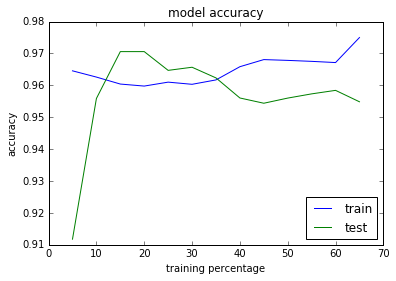

In [81]:


plt.plot(X,Ytest)
plt.plot(X,Ytrain)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('training percentage')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

